In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

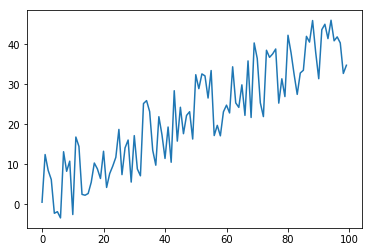

'reg = LinearRegression().fit(np.array(df.x[i]).reshape(-1,1), df.z[i])\ny_pred = reg.predict(np.array(df.x[i]).reshape(-1,1))\nperp_dist+=abs(-reg.coef_[0]*df.x[i][j] + df.z[i][j] -reg.intercept_)/(reg.coef_[0]**2 + 1)**0.5'

In [19]:
np.random.seed(42)
x = np.arange(100)
delta = np.random.uniform(-10,10, size=(100,))
y = .4 * x +3 + delta
plt.plot(y)
plt.show()
'''reg = LinearRegression().fit(np.array(df.x[i]).reshape(-1,1), df.z[i])
y_pred = reg.predict(np.array(df.x[i]).reshape(-1,1))
perp_dist+=abs(-reg.coef_[0]*df.x[i][j] + df.z[i][j] -reg.intercept_)/(reg.coef_[0]**2 + 1)**0.5'''

In [20]:
reg=LinearRegression().fit(x.reshape(-1,1), y)
reg.coef_, reg.intercept_

(array([ 0.40413986]), 2.1986916651151311)

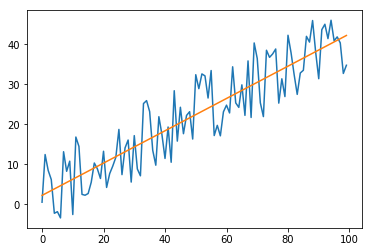

In [21]:
y_pred=reg.coef_[0]*x + reg.intercept_
plt.plot(y)
plt.plot(y_pred)
plt.show()

In [22]:
d=3
m = reg.coef_[0]
dx= d/(m*m +1)**0.5 

In [24]:
dx

2.7814417686153141

In [41]:
def y_pred(x):
    return float(m*x+reg.intercept_)

In [42]:
intercepts = [(1/float(m))*i + y_pred(i) for i in np.arange(min(x),max(x),float(dx)) ]
intercepts

[2.1986916651151311,
 10.205157370768182,
 18.211623076421233,
 26.218088782074283,
 34.224554487727332,
 42.231020193380388,
 50.237485899033437,
 58.243951604686494,
 66.250417310339543,
 74.256883015992599,
 82.263348721645642,
 90.269814427298698,
 98.27628013295174,
 106.2827458386048,
 114.28921154425785,
 122.2956772499109,
 130.30214295556394,
 138.30860866121702,
 146.31507436687005,
 154.32154007252311,
 162.32800577817613,
 170.33447148382919,
 178.34093718948225,
 186.3474028951353,
 194.35386860078836,
 202.36033430644142,
 210.36680001209447,
 218.3732657177475,
 226.37973142340059,
 234.38619712905364,
 242.39266283470664,
 250.39912854035975,
 258.40559424601275,
 266.41205995166581,
 274.41852565731892,
 282.42499136297192]

In [88]:
n=4
perp_dist=0

for i in range(0,len(intercepts)-1):
    bighits=[]
    smallhits=[]
    for j in range(len(x)):
        if y[j]<-1/m*x[j] + intercepts[min(i+n+1,len(intercepts)-1)] and y[j]>-1/m*x[j] + intercepts[max(i-n,0)]:
            bighits.append(j)
        if y[j]<-1/m*x[j] + intercepts[min(i+1,len(intercepts)-1)] and y[j]>-1/m*x[j] + intercepts[i]:
            smallhits.append(j)
        if len(smallhits)==0:
            continue
    new_x = np.array([x[k] for k in bighits])
    new_y = [y[k] for k in bighits]
    new_reg=LinearRegression().fit(new_x.reshape(-1,1), new_y)
    for l in smallhits:
        perp_dist+=abs(-new_reg.coef_[0]*x[l] + y[l] -new_reg.intercept_)/(new_reg.coef_[0]**2 + 1)**0.5
perp_dist/len(x)          

4.6135568090608032

In [90]:
def slidingWindow(x,y, n):
    
    reg=LinearRegression().fit(x.reshape(-1,1), y)
    reg.coef_, reg.intercept_
    d=3
    m = reg.coef_[0]
    dx= d/(m*m +1)**0.5 
    
    def y_pred(x):
        return float(m*x+reg.intercept_)
    
    intercepts = [(1/float(m))*i + y_pred(i) for i in np.arange(min(x),max(x),float(dx)) ]
    perp_dist=0

    for i in range(0,len(intercepts)-1):
        bighits=[]
        smallhits=[]
        for j in range(len(x)):
            if y[j]<-1/m*x[j] + intercepts[min(i+n+1,len(intercepts)-1)] and y[j]>-1/m*x[j] + intercepts[max(i-n,0)]:
                bighits.append(j)
            if y[j]<-1/m*x[j] + intercepts[min(i+1,len(intercepts)-1)] and y[j]>-1/m*x[j] + intercepts[i]:
                smallhits.append(j)
            if len(smallhits)==0:
                continue
        new_x = np.array([x[k] for k in bighits])
        new_y = [y[k] for k in bighits]
        new_reg=LinearRegression().fit(new_x.reshape(-1,1), new_y)
        for l in smallhits:
            perp_dist+=abs(-new_reg.coef_[0]*x[l] + y[l] -new_reg.intercept_)/(new_reg.coef_[0]**2 + 1)**0.5
    return perp_dist/len(x)          

In [94]:
slidingWindow(x,y,4)

4.6135568090608032